In [1]:
import numpy.random as rand
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from pulp import LpVariable, lpSum, LpProblem, LpMaximize, LpMinimize, value
# from ortools.sat.python import cp_model # ortools != tensorflow (protobuf)

### Linear programming

In [2]:
"""
model = cp_model.CpModel()
"""

'\nmodel = cp_model.CpModel()\n'

In [3]:
"""
#Boundaries#
var_upper_bound = max(50, 45, 37)
#Declare variables
x = model.NewIntVar(0, var_upper_bound, 'x')
y = model.NewIntVar(0, var_upper_bound, 'y')
z = model.NewIntVar(0, var_upper_bound, 'z')
"""

"\n#Boundaries#\nvar_upper_bound = max(50, 45, 37)\n#Declare variables\nx = model.NewIntVar(0, var_upper_bound, 'x')\ny = model.NewIntVar(0, var_upper_bound, 'y')\nz = model.NewIntVar(0, var_upper_bound, 'z')\n"

In [4]:
"""
#Remaining constraints#
model.Add(2*x + 7*y + 3*z <= 50)
model.Add(3*x - 5*y + 7*z <= 45)
model.Add(5*x + 2*y - 6*z <= 37)
#Maximise objective function#
model.Maximize(2*x + 2*y +3*z)
#Output possible solution#
solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.OPTIMAL:
    print('Maximum value of objective function: %i' % solver.ObjectiveValue())
    print('x value: ', solver.Value(x))
    print('y value: ', solver.Value(y))
    print('z value: ', solver.Value(z))
"""

"\n#Remaining constraints#\nmodel.Add(2*x + 7*y + 3*z <= 50)\nmodel.Add(3*x - 5*y + 7*z <= 45)\nmodel.Add(5*x + 2*y - 6*z <= 37)\n#Maximise objective function#\nmodel.Maximize(2*x + 2*y +3*z)\n#Output possible solution#\nsolver = cp_model.CpSolver()\nstatus = solver.Solve(model)\n\nif status == cp_model.OPTIMAL:\n    print('Maximum value of objective function: %i' % solver.ObjectiveValue())\n    print('x value: ', solver.Value(x))\n    print('y value: ', solver.Value(y))\n    print('z value: ', solver.Value(z))\n"

In [5]:
### PL

In [6]:
x = LpVariable("x")
y = LpVariable("y")
prob = LpProblem("myProblem", LpMaximize)
prob += x+2*y
prob += x+3*y <= 21
prob +=-x+3*y == 18
prob += x- y  <= 5
prob +=-x     <= 0
prob +=  - y  <= 0
prob.solve()
prob.variables

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/abdellah/miniforge3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/0f49470be72c45dea62d5cccfe5332e0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/0f49470be72c45dea62d5cccfe5332e0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 21 RHS
At line 27 BOUNDS
At line 30 ENDATA
Problem MODEL has 5 rows, 2 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-5) rows, 0 (-2) columns and 0 (-8) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 14.5
After Postsolve, objective 14.5, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 14.5 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from

<bound method LpProblem.variables of myProblem:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
_C1: x + 3 y <= 21

_C2: - x + 3 y = 18

_C3: x - y <= 5

_C4: - x <= 0

_C5: - y <= 0

VARIABLES
x free Continuous
y free Continuous
>

In [7]:
for v in prob.variables():
    print(f"La valeur de {v}: {value(v)}")

La valeur de x: 1.5
La valeur de y: 6.5


In [8]:
### 4.6

In [9]:
n, m = 6, 5
dist = [
        [ 290, 115, 355, 715, 810],
        [ 380, 340, 165, 380, 610],
        [ 505, 530, 285, 220, 450],
        [ 655, 450, 155, 240, 315],
        [1010, 840, 550, 305,  95],
        [1027,1097, 747, 372, 333]
       ]
empty  = [10, 12, 20, 24, 18, 40]
demand = [20, 15, 25, 33, 21]

l = LpVariable.dicts("l", [str.format("({0},{1})",i,j) for i in range(1, n+1) for j in range(1, m+1)], lowBound = 0, cat = "Integer")
x = LpVariable.dicts("x", [str.format("({0},{1})",i,j) for i in range(1, n+1) for j in range(1, m+1)], lowBound = 0, cat = "Integer")

prob  = LpProblem("Max-Flow", LpMinimize) 
prob += lpSum([dist[i-1][j-1]*l[str.format("({0},{1})",i,j)] for i in range(1, n+1) for j in range(1, m+1)])

for i in range(1, n+1):
    prob += lpSum([x[str.format("({0},{1})",i,j)] for j in range(1, m+1)]) <=  empty[i-1] 
    
for j in range(1, m+1):
    prob += lpSum([x[str.format("({0},{1})",i,j)] for i in range(1, n+1)]) == demand[j-1] 
    
for i in range(1, n+1):
    for j in range(1, m+1):
        prob += 2*l[str.format("({0},{1})",i,j)] >= x[str.format("({0},{1})",i,j)]
        
prob.solve()

for v in prob.variables():
    print(f"La valeur de {v}: {value(v)}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/abdellah/miniforge3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/c00cf02185d948c7a4850c14154b12b8-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/c00cf02185d948c7a4850c14154b12b8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 46 COLUMNS
At line 317 RHS
At line 359 BOUNDS
At line 420 ENDATA
Problem MODEL has 41 rows, 60 columns and 120 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 15076.5 - 0.00 seconds
Cgl0003I 0 fixed, 30 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 41 rows, 60 columns (60 integer (0 of which binary)) and 120 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0012I Integer solution of 16184 fo

In [10]:
28.6*2

57.2

In [11]:
n = 15
d = [4, 4.5, 5, 4.1, 2.4, 5.2, 3.7, 3.5, 3.2, 4.5, 2.3, 3.3, 3.8, 4.6, 3]

x = LpVariable.dicts("x", [str.format("{0}",i+1) for i in range(n)],lowBound = 0, upBound = 1, cat = "Integer")
e = LpVariable("e", lowBound = 0)

prob  = LpProblem("parking", LpMinimize) 
prob += e
prob += lpSum([d[i]*   x[str.format("{0}",i+1)]  for i in range(n)]) <= e
prob += lpSum([d[i]*(1-x[str.format("{0}",i+1)]) for i in range(n)]) <= e
prob.solve()

for v in prob.variables():
    print(f"La valeur de {v}: {value(v)}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/abdellah/miniforge3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/f0fc6dacc87b4a94aa9f38955adeb9f1-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/f0fc6dacc87b4a94aa9f38955adeb9f1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 71 RHS
At line 74 BOUNDS
At line 90 ENDATA
Problem MODEL has 2 rows, 16 columns and 32 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 28.55 - 0.00 seconds
Cgl0004I processed model has 2 rows, 15 columns (14 integer (13 of which binary)) and 30 elements
Cbc0038I Initial state - 1 integers unsatisfied sum - 0.0288462
Cbc0038I Pass   1: suminf.    0.03333 (1) obj. 28.55 iterations 1
Cbc0038I Solution found of 28.55
Cbc0038

In [12]:
n = 15
d = [4, 4.5, 5, 4.1, 2.4, 5.2, 3.7, 3.5, 3.2, 4.5, 2.3, 3.3, 3.8, 4.6, 3]

x = LpVariable.dicts("x", [str.format("{0}",i+1) for i in range(n)],lowBound = 0, upBound = 1, cat = "Integer")
e = LpVariable("e", lowBound = 0)

prob  = LpProblem("parking", LpMinimize) 
prob += e
prob += lpSum([d[i]*   x[str.format("{0}",i+1)]  for i in range(n)]) <= e
prob += lpSum([d[i]*(1-x[str.format("{0}",i+1)]) for i in range(n)]) <= 15
prob.solve()

for v in prob.variables():
    print(f"La valeur de {v}: {value(v)}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/abdellah/miniforge3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/800d6c4c9aaf4d2c8616b829c66298a2-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/800d6c4c9aaf4d2c8616b829c66298a2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 70 RHS
At line 73 BOUNDS
At line 89 ENDATA
Problem MODEL has 2 rows, 16 columns and 31 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 42.1 - 0.00 seconds
Cgl0004I processed model has 2 rows, 15 columns (14 integer (13 of which binary)) and 29 elements
Cbc0038I Initial state - 1 integers unsatisfied sum - 0.26087
Cbc0038I Pass   1: suminf.    0.12000 (1) obj. 42.1 iterations 1
Cbc0038I Pass   2: suminf.    0.00000 (0) ob

In [13]:
### 5.3

In [14]:
k = 6
l = 40
d = [700, 600, 500, 800, 900, 800]

y = LpVariable.dicts("y", [str.format("{0}",i+1) for i in range(k+1)],lowBound = 0, cat = "Integer")
n = LpVariable.dicts("n", [str.format("{0}",i+1) for i in range(k)  ],lowBound = 0, upBound = 5, cat = "Integer")
m = LpVariable.dicts("m", [str.format("{0}",i+1) for i in range(k)  ],lowBound = 0, upBound = 5, cat = "Integer")
a = LpVariable.dicts("a", [str.format("{0}",i+1) for i in range(k)  ],lowBound = 0, cat = "Integer")

prob  = LpProblem("production", LpMinimize) 
prob += lpSum([500*n[str.format("{0}",i+1)]+700*m[str.format("{0}",i+1)]+10*y[str.format("{0}",i+1)]+5*a[str.format("{0}",i+1)] for i in range(k)])

for i in range(1, k+1):
    prob += y[str.format("{0}",i+1)] == y[str.format("{0}",i)] + 20*(l + lpSum([n[str.format("{0}",j+1)]-m[str.format("{0}",j+1)] for j in range(i)])) + a[str.format("{0}",i)] - d[i-1]
    prob += a[str.format("{0}",i  )] <= 6*(l + lpSum([n[str.format("{0}",j+1)]-m[str.format("{0}",j+1)] for j in range(i)]))

prob += y["1"] == 0
prob += y["7"] == 0

prob.solve()

for v in prob.variables():
    print(f"La valeur de {v}: {value(v)}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/abdellah/miniforge3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/2be907249a174fa0b9b0e1687e63e67b-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/2be907249a174fa0b9b0e1687e63e67b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 19 COLUMNS
At line 204 RHS
At line 219 BOUNDS
At line 245 ENDATA
Problem MODEL has 14 rows, 25 columns and 110 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 10000 - 0.00 seconds
Cgl0004I processed model has 9 rows, 20 columns (20 integer (0 of which binary)) and 88 elements
Cutoff increment increased from 1e-05 to 4.9999
Cbc0012I Integer solution of 10000 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Se

### Graph

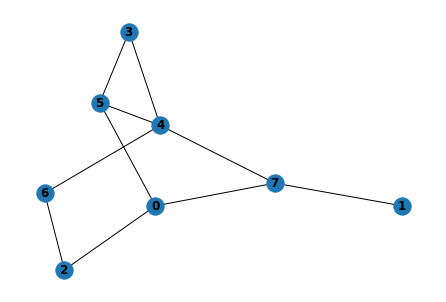

In [15]:
G = nx.sedgewick_maze_graph()
nx.draw(G, with_labels=True, font_weight='bold')

### Dynamic programming

In [16]:
## PROBLEM 07–0274:

{(1, 2): Text(0.5, 0.25, '4'),
 (1, 3): Text(0.5, -0.25, '2'),
 (2, 4): Text(1.5, 0.75, '6'),
 (2, 5): Text(1.5, 0.25, '3'),
 (2, 6): Text(1.5, -0.25, '4'),
 (3, 4): Text(1.5, 0.25, '3'),
 (3, 5): Text(1.5, -0.25, '4'),
 (3, 6): Text(1.5, -0.75, '2'),
 (4, 7): Text(2.5, 0.75, '2'),
 (4, 8): Text(2.5, 0.25, '6'),
 (5, 7): Text(2.5, 0.25, '6'),
 (5, 8): Text(2.5, -0.25, '2'),
 (6, 7): Text(2.5, -0.25, '3'),
 (6, 8): Text(2.5, -0.75, '5'),
 (7, 9): Text(3.5, 0.25, '2'),
 (8, 9): Text(3.5, -0.25, '5')}

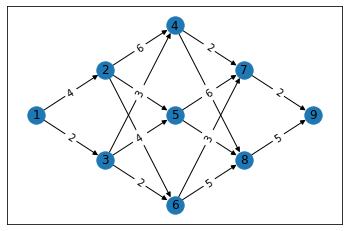

In [17]:
G = nx.Graph().to_directed()
weighted_edges = [(1, 2, 4), (1, 3, 2),
                  (2, 4, 6), (2, 5, 3), (2, 6, 4),
                  (3, 4, 3), (3, 5, 4), (3, 6, 2),
                  (4, 7, 2), (4, 8, 6),
                  (5, 7, 6), (5, 8, 2),
                  (6, 7, 3), (6, 8, 5),
                  (7, 9, 2), (8, 9, 5),
                 ]
G.add_weighted_edges_from(weighted_edges)
edge_labels = nx.get_edge_attributes(G, "weight")
l   = [[0, 0], [1, 0.5], [1,-0.5], [2, 1], [2, 0], [2,-1], [3, 0.5], [3,-0.5], [4, 0]]
pos = nx.spring_layout(G) 
for k in range(9):
    pos[k+1] = l[k]

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [18]:
stage = np.array([[1],[2,3],[4,5,6],[7,8],[9]])
costs = np.zeros((9,9))
for weighted_edge in weighted_edges:
    costs[weighted_edge[0]-1,weighted_edge[1]-1] = weighted_edge[2]

def v(i,k):
    if i == 1 and k == 1:
        return 0
    elif k not in stage[i-1]:
        return -np.inf
    else :
        l = [v(i-1,j)+costs[j-1,k-1] for j in stage[i-2]]
        return max(l)
    
v(5,9)

/var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/ipykernel_543/3808062929.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stage = np.array([[1],[2,3],[4,5,6],[7,8],[9]])


21.0

### Branch and bound

### Column generation

In [19]:
D = [48, 35, 24, 10, 8 ] # Demand
S = [20, 45, 50, 55, 75] # Width of the i-th roll
W = 75*20 # Width
m = len(D)
k = 3   # length of I_0
eps = 1e-3

In [20]:
def cuts(S,W):
    if len(S) < 1:
        return []
    elif 0 < len(S) < 2:
        return [[int(W/S[-1])]]
    else:
        n = int(W/S[-1])+1 # maximum number of rolls that can be cut + 1
        A = []
        for i in range(n):
            for cut in cuts(S[:-1], W-i*S[-1]):
                A += [cut+[i]]
        return A

In [21]:
A = cuts(S,W)
I = range(len(A))

In [22]:
x = LpVariable.dicts("x", [str.format("{0}",i) for i in I], lowBound = 0, upBound = 100, cat = "Integer")
s = LpVariable.dicts("s", [str.format("{0}",i) for i in I], lowBound = 0, upBound = 10000)
l = LpVariable.dicts("l", [str.format("{0}",i) for i in range(m)], lowBound = 0, upBound = 10000)

primal  = LpProblem("Primal", LpMinimize)
primal += lpSum([x[str.format("{0}",i)] for i in I])
                                                                                      
for i in range(m):
    primal += lpSum([A[j][i]*x[str.format("{0}",j)] for j in I]) >= D[i]
                     
primal.solve()
for v in primal.variables():
    print(f"La valeur de {v}: {value(v)}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/abdellah/miniforge3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/441f6df10fca4139b37ab71c0a3d3230-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/441f6df10fca4139b37ab71c0a3d3230-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 226151 RHS
At line 226157 BOUNDS
At line 256624 ENDATA
Problem MODEL has 5 rows, 30466 columns and 134742 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 3.25667 - 0.02 seconds
Cgl0004I processed model has 5 rows, 30466 columns (30466 integer (0 of which binary)) and 134742 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0012I Integer solution of 47 found by greedy cover after 0 iterations and 0 nodes (0.18 

In [23]:
x = LpVariable.dicts("x", [str.format("{0}",i) for i in I], lowBound = 0, upBound = 100, cat = "Integer")
s = LpVariable.dicts("s", [str.format("{0}",i) for i in I], lowBound = 0, upBound = 10000)
l = LpVariable.dicts("l", [str.format("{0}",i) for i in range(m)], lowBound = 0, upBound = 10000)
y = LpVariable.dicts("y", [str.format("{0}",i) for i in range(m)], lowBound = 0, upBound = 10000, cat = "Integer")

#solution = []
I_0 = random.sample(I, k)

while True:
    
    optimal = True
    
    dual  = LpProblem("Dual", LpMaximize) 
    dual += lpSum([D[i]*l[str.format("{0}",i)] for i in range(m)])

    for j in I_0:
        dual += lpSum([A[j][i]*l[str.format("{0}",i)] for i in range(m)]) == 1 - s[str.format("{0}",j)]
    
    dual.solve()  
    
    subproblem  = LpProblem("Knapsack", LpMaximize)
    subproblem += lpSum([value(l[str.format("{0}",i)])*y[str.format("{0}",i)] for i in range(m)])
    subproblem += lpSum([S[i]*y[str.format("{0}",i)] for i in range(m)]) <= W
    subproblem.solve()
    
    if subproblem.objective.value() <= 1 + eps:
        break
    
    else:
        I_0.append(A.index([value(v) for v in subproblem.variables()]))
    
primal  = LpProblem("Primal", LpMinimize)
primal += lpSum([x[str.format("{0}",i)] for i in I_0])
                                                                                      
for i in range(m):
    primal += lpSum([A[j][i]*x[str.format("{0}",j)] for j in I_0]) >= D[i]
                     
primal.solve()
for v in primal.variables():
    print(f"La valeur de {v}: {value(v)}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/abdellah/miniforge3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/e18a2e58ffeb4317aeab786baafe8732-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/ll/f_v0rt1515j5wph8nq7kr35r0000gn/T/e18a2e58ffeb4317aeab786baafe8732-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 32 RHS
At line 36 BOUNDS
At line 45 ENDATA
Problem MODEL has 3 rows, 8 columns and 18 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 4 (-4) columns and 12 (-6) elements
0  Obj -0 Dual inf 63.538447 (4)
2  Obj 7.3035714
Optimal - objective value 7.3035714
After Postsolve, objective 7.3035714, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 7.303571429 - 2 iterations time 0.002, Presolve 0.00
Option for printingOp

### Dynamic programming

In [24]:
def sub(A,B):
    if len(A)*len(B)<1:
        return 0
    else:
        if A[0] == B[0]:
            return 1+sub(A[1:],B[1:])
        return max(sub(A[1:],B),sub(A,B[1:]))

In [25]:
sub("ABCBDAB","BDCABA")

4

In [26]:
def sup(A,B):
    return len(A)+len(B)-sub(A,B)

In [27]:
sup("ABCBDAB","BDCABA")

9

In [28]:
def inc(A, i, n, x):
    if n < i + 1:
        return 0
    else:
        a = 0
        if A[i] >= x:
            a = 1 + inc(A, i+1, n, A[i])
        b = inc(A, i+1, n, x)
    return max(a, b)

In [29]:
A = [0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15]
n = len(A)
inc(A, 0, n, A[0])

6

In [30]:
def leven(A,B):
    d = sub(A,B)
    return max(len(A)-d, len(B)-d)

In [31]:
leven("kitten", "setting")

4

In [32]:
[(12,12),(13,12)]+[(14,53)]

[(12, 12), (13, 12), (14, 53)]

In [33]:
def mult(l):
    if len(l)<1:
        return 0
    elif 1 < len(l) < 3:
        return l[0][0]*l[0][1]*l[1][1]
    return  min(l[0][0]*l[0][1]*l[1][1]+mult([[l[0][0],l[1][1]]]+l[2:]),l[1][0]*l[1][1]*l[2][1]+mult([l[0]]+[[l[1][0],l[2][1]]]+l[3:]))

In [34]:
l = [[10, 30], [30,5], [5, 60]] 
mult(l)

4500

In [35]:
def Knapsack(k, v, w, W):
    if k < 1:
        if w[k] < W: 
            return v[k]
        return 0
    else:
        a = 0
        if w[k] < W:
            a = Knapsack(k-1, v, w, W - w[k]) + v[k]
        b = Knapsack(k-1, v, w, W)
    return max(a,b)

In [36]:
v = [20, 5, 10, 40, 15, 25]
w = [ 1, 2,  3,  8,  7,  4]
W = 10
Knapsack(5, v, w, W)

60

In [37]:
def subpart(S, n, k):
    if sum(S[:n]) < k or k < 0:
        return False
    elif sum(S[:n]) == k:
        return True
    else:
        a = False
        if S[n] < k:
            a = a or subpart(S, n-1, k-S[n])
        b = subpart(S, n-1, k)
        return a or b
    
def partition(S):
    n = sum(S)
    if n % 2 > 0:
        return False
    return subpart(S, len(S)-1, n/2)

In [38]:
S = [3, 1, 1, 2, 2, 1]
partition(S)

True

In [39]:
def rod(length, prices, rodlength):
    table = [[0 for i in range(rodlength)] for price in prices]
    for j in range(rodlength):
        table[0][j] = prices[0]*((j+1)//length[0])
    for i in range(1,len(prices)):
        for j in range(rodlength):
            if length[i] <= j+1:
                table[i][j] = table[i][j+1-length[i]]+prices[i]
            else:
                table[i][j] = table[i-1][j]
    return table[-1][-1]

In [40]:
length = [1, 2, 3, 4, 5, 6, 7, 8]
prices = [1, 5, 8, 9, 10, 17, 17, 20]
rodlength = 4
rod(length, prices, rodlength)

10

In [41]:
def coin(S, k):
    if k in S:
        return 1
    else: 
        return 1+min([coin(S, k-l) for l in S if l < k])

In [42]:
coin({ 1, 3, 5, 7 }, 15)

3

In [43]:
def gold(player, l):
    if len(l) < 2:
        return l[0]
    return max(-v(1-player, l[:-1])+l[-1], -v(1-player, l[1:]))